In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import re
import time
from datetime import datetime, timedelta
from pandas.tseries.offsets import *
import locale
locale.setlocale(locale.LC_TIME, "de_DE.UTF-8")

%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'patch.facecolor': '#C5C6C8',
    'patch.edgecolor': '#C5C6C8',
    'patch.antialiased': True,
    'font.size': 10.0,
    #'font.family': 'Futura',
    'axes.facecolor': '#C5C6C8',
    'axes.edgecolor': '#C5C6C8',
    'axes.linewidth': '1',
    'axes.grid': False,
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.labelcolor': 'black',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#002458', '#01388B', '#0474BC', '#009DE0', '#004318', '#016B29', '#6AAF21', '#BCCD02', '#013646', '#015764', '#017783', '#0198A1', '#570B56', '#7A0B69', '#E30059', '#700D10', '#940D13', '#EF7F01', '#FDCC03']),
    'xtick.color': 'black',
    'xtick.direction': 'out',
    'ytick.color': 'black',
    'ytick.direction': 'out',
    'grid.color': '#C5C6C8',
    'grid.linestyle': '-',
    'figure.facecolor': '#C5C6C8',
    'savefig.bbox' : 'tight'
})

In [3]:
df = pd.read_csv('gender.tsv', delimiter='\t')

In [4]:
df.head()

,percent_male,male_count,femalecount,word
0,28.31,1695,760,nahmen
1,76.79,4205,225,wladimir
2,66.89,3354,294,gestiegen
3,53.48,4909,756,rennen
4,36.06,6589,2069,richtig


In [5]:
df = df.sort_values('percent_male')[11:]
df.reset_index()
df.sort_values('percent_male').head()

,percent_male,male_count,femalecount,word
1114,0.02,2,1710,kurzrezension
181,0.12,4,591,hochschwanger
1054,0.67,70,1838,1em
1123,0.70,42,1060,lieblingsthema
543,0.74,25,592,schlampe


In [6]:
df = df[~(df.word=='1em')]
df = df[~(df.word=='android')]
df = df[~(df.word=='newsletter')]

In [7]:
df['percent_female']=100-df.percent_male

In [8]:
df_stacked=pd.concat([df.sort_values('percent_male', ascending = False).head(10), df.sort_values('percent_female', ascending = False).head(10)])

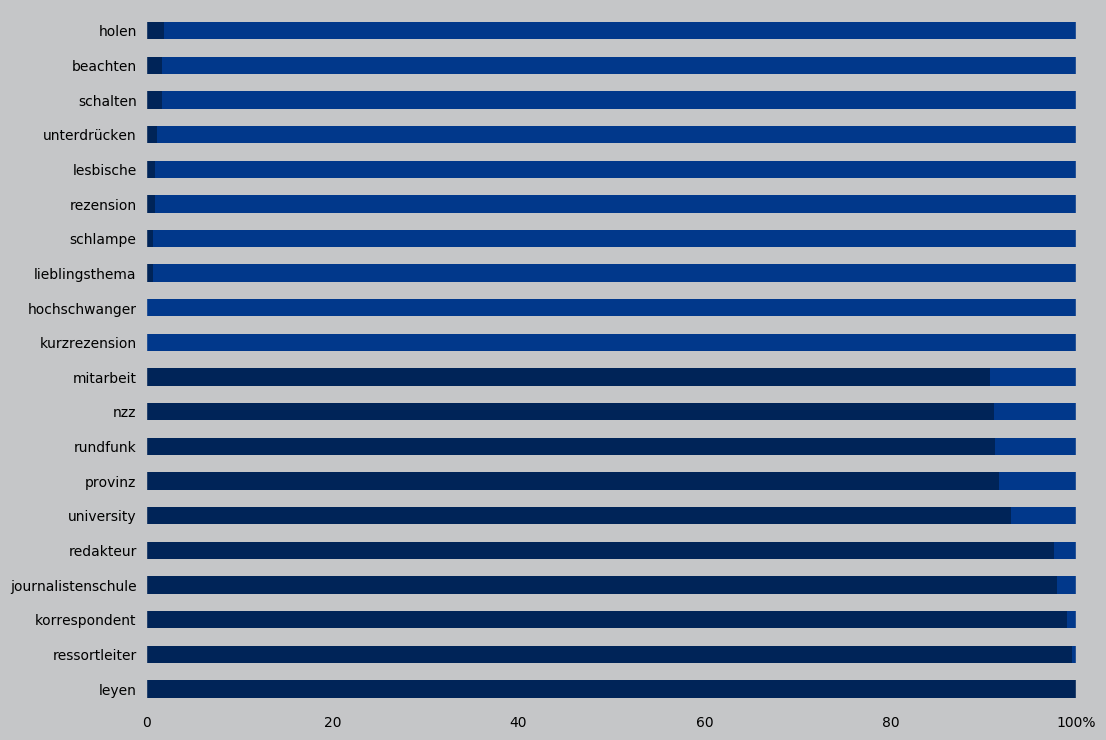

In [9]:
ax = df_stacked.plot(kind='barh', y=['percent_male', 'percent_female'], stacked=True,figsize=(12,9))
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)
ax.set_yticklabels(df_stacked.word)
ax.set_xlim([0,100])
ax.set_xticklabels([0,20,40,60, 80, '100%'])
ax.legend().set_visible(False)
plt.savefig("1.pdf", facecolor = ax.get_facecolor())
plt.show()

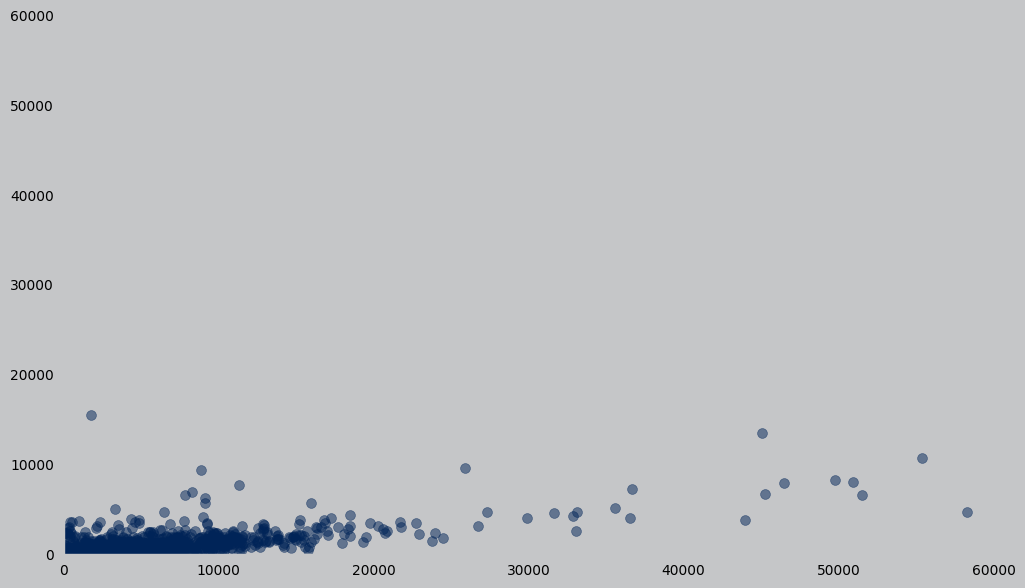

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(y=df.femalecount, x=df.male_count, s=50, alpha=0.5)
#plt.gca().invert_yaxis()
ax.set_xlim([0,60000])
ax.set_ylim([0,60000])
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.tick_params(which='both', left=False, bottom=False)
plt.savefig("2.pdf", facecolor = ax.get_facecolor())
plt.show()


In [11]:
df.sort_values('male_count', ascending=False)

,percent_male,male_count,femalecount,word,percent_female
673,68.47,58273,4752,deutschen,31.53
232,47.70,55391,10754,jahren,52.30
1245,58.00,51486,6602,prozent,42.00
866,52.83,50910,8048,deutschland,47.17
825,51.71,49759,8226,jahr,48.29
347,50.79,46459,7971,jahre,49.21
355,54.36,45237,6726,euro,45.64
1172,37.12,45047,13512,menschen,62.88
955,67.29,43961,3783,welt,32.71
913,47.09,36680,7296,zeit,52.91


45.8% gendered
2886119 sentences about men.
719419 sentences about women.
4.0 sentences about men for each sentence about women.

In [12]:
total = (719419+2886119)/0.458
male = 2886119
female = 719419
no_gender = total-male-female

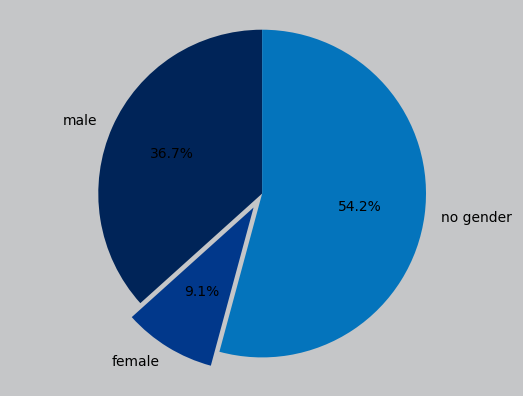

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['male', 'female', 'no gender']
sizes = [male, female, no_gender]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


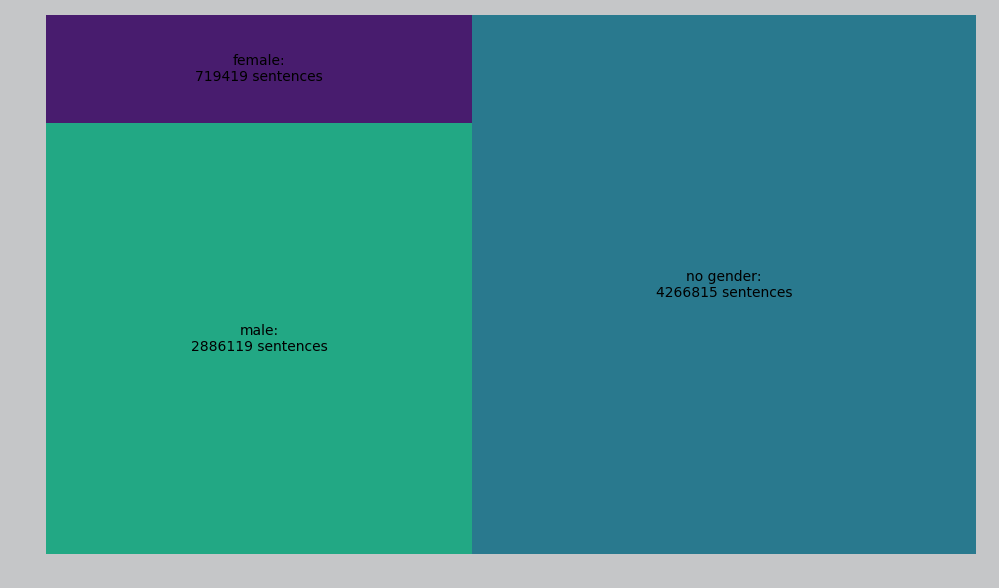

In [14]:
labels=['male:\n'+str(male)+' sentences', 'female:\n'+str(female)+' sentences','no gender:\n'+str(int(no_gender))+' sentences']

import squarify
fig, ax = plt.subplots(figsize=(12,7))
ax = squarify.plot([int(male), int(female), int(no_gender)], label = labels)
plt.axis('off')
plt.savefig("3.pdf", facecolor = ax.get_facecolor())
plt.show()

